# Modelagem à partir dos dados

Neste projeto um grafo será modelado para que a análise seja realizada através de algoritmos aplicados à essa estrutura. Portanto primeiramente este grafo será modelado com os dados exportados pelo [DataCleaning.ipynb](#https://github.com/jAzz-hub/DesmatamentoNoAmazonas/blob/main/Notebooks/DataCleaning.ipynb).

In [16]:
#Importando modulos:
from modules import *

import nx_altair as nxa

DATASETS = []

#Recriando vetor com dados tratados
for i in range(0,19):
    if i < 10: DATASETS.append(pd.read_csv(f'../Data/CleanData2000_2018/Cleaned200{i}.csv', sep=',', encoding='utf-8'))
    elif i>=10: DATASETS.append(pd.read_csv(f'../Data/CleanData2000_2018/Cleaned20{i}.csv', sep=',', encoding='utf-8'))
     

DATASETS[0].head(3)



,Lat,Long,Municipio,AreaKm2,Desmatado2000,Floresta2000,NaoObservado2000,NaoFloresta2000,Hidrografia2000,Fronteiras,MaiorQueAMédia
0,-2.83490,-57.83095,Urucurituba,2915,82.3,142.7,0.0,1689.6,1000.4,"['Boa Vista do Ramos', 'Barreirinha', 'Itapira...",False
1,-1.24938,-58.78714,Urucara,28012,299.2,26642.5,0.9,423.0,646.4,"['Nhamunda', 'Urucurituba', 'Itapiranga', 'Sao...",False
2,-3.20648,-65.43058,Uarini,10448,194.2,9721.7,0.0,100.3,431.8,"['Maraa', 'Fonte Boa', 'Jurua', 'Alvaraes', 'T...",False


### Função que cria arestas dos nós de cidades vizinhas:

A função recebe um `dataFrame` e estabelece as arestas(adjascência) entre nós(municípios) com base nas nas listas da coluna `Fronteira`.


In [17]:

dictAverageHigh = pd.Series(DATASETS[0]['MaiorQueAMédia'].values, index = DATASETS[0]['Municipio']).to_dict()

#Retorna uma lista de dois índices, o primeiro elemento é um grafo com todas as arestas e o segundo um grafo apenas com as arestas de desmatamento acima da média:
def LinkGenerator(dataFrame):
    
    Map = nx.Graph()
    MapAvgHigh = nx.Graph()
    
    edge_atributes = {}
    
    for line in range(0, len(dataFrame['Municipio'])):
        
        neighbors = [ast.literal_eval(neighbor) for neighbor in dataFrame['Fronteiras']]
        
        for cityNeighbor in neighbors[line]:
            AvgHighNeighbours = (dictAverageHigh[f'{cityNeighbor}'] and dictAverageHigh[f"{dataFrame['Municipio'][line]}"] )

            if not Map.has_edge(dataFrame['Municipio'][line], cityNeighbor) and  not Map.has_edge(cityNeighbor, dataFrame['Municipio'][line]):   
                Map.add_node(dataFrame['Municipio'][line])
                Map.add_edge(dataFrame['Municipio'][line], cityNeighbor, edge=AvgHighNeighbours)#Fronteiras 
                
                if AvgHighNeighbours:
                    MapAvgHigh.add_edge(dataFrame['Municipio'][line], cityNeighbor)
                # nx.set_edge_attributes(Map, {}(dictAverageHigh[f'{cityNeighbor}'] and dictAverageHigh[f"{dataFrame['Municipio'][line]}"] ), 'AvgHigh') 
            else:
                pass
    
    
    return [Map, MapAvgHigh]

Atribuindo latitutude, longitude e desmatamento em kilometros quadrados aos nós dos grafos:

In [18]:

#Criando Grafos para cada ano:

lat_dict = dict(zip(DATASETS[0].Municipio, DATASETS[0].Lat))
long_dict = dict(zip(DATASETS[0].Municipio, DATASETS[0].Long))

Graphs = []
for i in range(0, len(DATASETS)):
    if i < 10:
        Km_deforestation = dict(zip(DATASETS[i].Municipio, DATASETS[i][f'Desmatado200{i}']))
    else:
        Km_deforestation = dict(zip(DATASETS[i].Municipio, DATASETS[i][f'Desmatado20{i}']))
    
        
    Graphs.append(LinkGenerator(DATASETS[i]))
    nx.set_node_attributes(Graphs[i][0], lat_dict, 'Latitude')
    nx.set_node_attributes(Graphs[i][0] ,lat_dict, 'Latitude')
    nx.set_node_attributes(Graphs[i][0] ,long_dict, 'Longitude')
    nx.set_node_attributes(Graphs[i][0] ,Km_deforestation, 'Km2_deforestation')
    nx.set_node_attributes(Graphs[i][1], lat_dict, 'Latitude')
    nx.set_node_attributes(Graphs[i][1] ,lat_dict, 'Latitude')
    nx.set_node_attributes(Graphs[i][1] ,long_dict, 'Longitude')
    nx.set_node_attributes(Graphs[i][1] ,Km_deforestation, 'Km2_deforestation')



In [19]:
Graphs[0][1].edges(data = True)

EdgeDataView([('Rio Preto da Eva', 'Itacoatiara', {}), ('Rio Preto da Eva', 'Manaus', {}), ('Rio Preto da Eva', 'Presidente Figueiredo', {}), ('Itacoatiara', 'Maues', {}), ('Itacoatiara', 'Manaus', {}), ('Itacoatiara', 'Autazes', {}), ('Manaus', 'Presidente Figueiredo', {}), ('Manaus', 'Manacapuru', {}), ('Manaus', 'Careiro', {}), ('Manaus', 'Manaquiri', {}), ('Manaus', 'Autazes', {}), ('Parintins', 'Nhamunda', {}), ('Parintins', 'Barreirinha', {}), ('Nhamunda', 'Maues', {}), ('Barreirinha', 'Maues', {}), ('Novo Aripuana', 'Manicore', {}), ('Novo Aripuana', 'Apui', {}), ('Novo Aripuana', 'Borba', {}), ('Manicore', 'Humaita', {}), ('Manicore', 'Borba', {}), ('Apui', 'Maues', {}), ('Apui', 'Borba', {}), ('Borba', 'Maues', {}), ('Borba', 'Manaquiri', {}), ('Borba', 'Careiro', {}), ('Borba', 'Autazes', {}), ('Humaita', 'Canutama', {}), ('Manacapuru', 'Manaquiri', {}), ('Manacapuru', 'Careiro', {}), ('Careiro', 'Manaquiri', {}), ('Careiro', 'Autazes', {}), ('Labrea', 'Boca do Acre', {}), ('

# Vizualização dos dados:

Tentando uma abordagem de visualização e análise de dados com [nx_altair](#https://github.com/Zsailer/nx_altair).

Grafo do Estado do Amazônas em 2018 com Todos os Municípios:

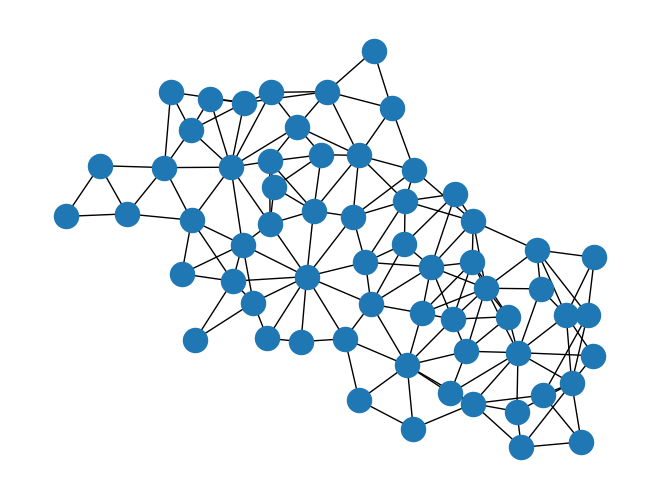

In [20]:

nx.draw_kamada_kawai(Graphs[17][0])


SubGrafo do Estado do Amazônas em 2018 indicando Municípios adjascêntes com desmatamento acima da média:

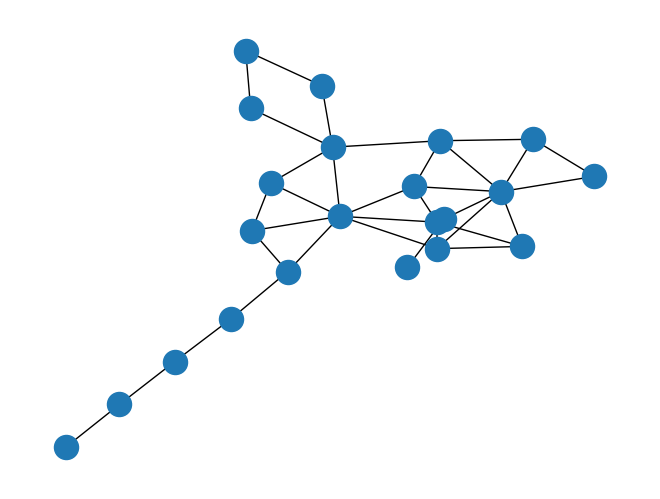

In [21]:

nx.draw_kamada_kawai(Graphs[17][1])

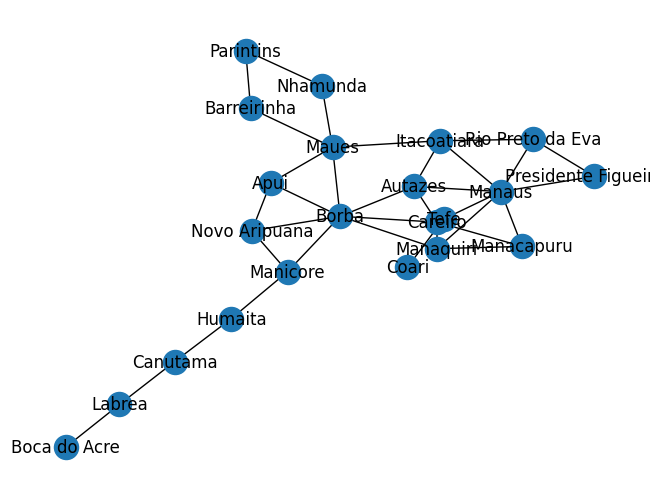

In [22]:

nx.draw_kamada_kawai(Graphs[17][1], with_labels = True)

# Exportando dados para GEFX
Uma tentativa de vizualização e análise serão realizadas através do Gephi.

In [23]:
for index,graph in enumerate(Graphs):
    if index < 10:    
        nx.write_gexf(graph[0], f"../Data/GEXF/NORMAL_GRAPH/DesmatamentoMunicipalAM_200{index}.gexf")
        nx.write_gexf(graph[1], f"../Data/GEXF/AVG_HIGH_GRAPH/DesmatamentoMunicipalAM_200{index}.gexf")
    else:
        nx.write_gexf(graph[0], f"../Data/GEXF/NORMAL_GRAPH/DesmatamentoMunicipalAM_20{index}.gexf")
        nx.write_gexf(graph[1], f"../Data/GEXF/AVG_HIGH_GRAPH/DesmatamentoMunicipalAM_20{index}.gexf")
        

Associando Desmatamento Total da região aos cliques

In [24]:

cliquesAvgHigh = []
cliquesNormal = []
for graph in Graphs:
    cliquesAvgHigh.append(nx.find_cliques(graph[1]))
    cliquesNormal.append(nx.find_cliques(graph[0]))

Cliques de desmatamento acima da média em 2018:

In [25]:
for i in cliquesAvgHigh[17]:
    print(i)


['Itacoatiara', 'Manaus', 'Rio Preto da Eva']
['Itacoatiara', 'Manaus', 'Autazes']
['Itacoatiara', 'Maues']
['Manacapuru', 'Manaquiri', 'Manaus', 'Careiro']
['Nhamunda', 'Parintins']
['Nhamunda', 'Maues']
['Canutama', 'Humaita']
['Canutama', 'Labrea']
['Boca do Acre', 'Labrea']
['Parintins', 'Barreirinha']
['Coari', 'Tefe']
['Barreirinha', 'Maues']
['Humaita', 'Manicore']
['Rio Preto da Eva', 'Presidente Figueiredo', 'Manaus']
['Manaus', 'Careiro', 'Autazes']
['Borba', 'Careiro', 'Manaquiri']
['Borba', 'Careiro', 'Autazes']
['Borba', 'Apui', 'Novo Aripuana']
['Borba', 'Apui', 'Maues']
['Borba', 'Manicore', 'Novo Aripuana']


Delimitação de regiões com alto índice de desmatamento através de cliques em grafos

In [27]:
DATASETS[0][10:60]

,Lat,Long,Municipio,AreaKm2,Desmatado2000,Floresta2000,NaoObservado2000,NaoFloresta2000,Hidrografia2000,Fronteiras,MaiorQueAMédia
10,0.35952,-68.17017,Sao Gabriel da Cachoeira,112476,1043.5,109083.6,370.6,489.6,1482.3,"['Japura', 'Santa Isabel do Rio Negro']",True
11,-3.08079,-69.06723,Santo Antonio do Ica,12737,111.3,12018.8,65.2,90.4,451.3,"['Sao Paulo de Olivenca', 'Tabatinga', 'Amatur...",False
12,-0.25129,-64.98731,Santa Isabel do Rio Negro,64130,186.6,62250.9,70.9,950.8,628.3,"['Sao Gabriel da Cachoeira', 'Japura', 'Maraa'...",False
13,-2.50853,-59.60122,Rio Preto da Eva,5838,500.6,5326.0,1.1,0.0,10.3,"['Itacoatiara', 'Manaus', 'Itapiranga', 'Presi...",True
14,-0.65847,-60.17004,Presidente Figueiredo,25568,524.8,21614.9,5.4,1.1,3421.8,"['Rio Preto da Eva', 'Manaus', 'Novo Airao', '...",True
15,-7.76452,-68.19675,Pauini,42877,149.5,42439.7,2.3,23.7,261.8,"['Boca do Acre', 'Envira', 'Itamarati', 'Eirun...",False
16,-2.78735,-56.68566,Parintins,5958,883.3,1660.3,0.0,1133.2,2281.2,"['Nhamunda', 'Urucurituba', 'Barreirinha']",True
17,-6.83379,-60.23604,Novo Aripuana,41452,534.7,38526.6,27.9,1620.2,742.6,"['Manicore', 'Apui', 'Borba']",True
18,-1.51628,-61.51599,Novo Airao,38114,79.6,36463.1,0.7,211.9,1358.7,"['Barcelos', 'Codajas', 'Caapiranga', 'Manacap...",False
19,-4.02487,-58.58633,Nova Olinda do Norte,5625,359.2,4553.5,0.3,281.0,431.0,"['Borba', 'Maues', 'Autazes', 'Itacoatiara']",False




<!-- Ideias de perguntas e justificativas:    
    - Há regiões desmatamento acima da média?
    - Como o desmatamento acima da média se dispõe em escala municipal no estado do Amazonas?
    
    - Em 18 anos como essas regiões se comportaram?
    [] - Criar valor total de desmatamento por clique
-->



<!-- # Plano futuros:
Propor para pessoas ou elaborar sozinho atividades de análise de dados que pesquisem:
    
- As perguntas
    - Regiões de desmatamento acima da média em comparação à regiões sem desmatamento acima da média?

    - Como o desmatamento se comporta dentro das regiões acima da média?


- Geração de dados como método assistivo à políticas de reflorestamento em municípios possíveis do Brasil.
    - Estudo de como se dá o reflorestamento.
    - Conferir dados possíveis de serem anaĺisados para contribuir com o reflorestamento.
    - Propor sistema que usufrua de métodos estatísticos para contribuir com atividade.

- Geração de dados como método assistivo à políticas de fiscalização preventiva ou corretiva ao desmatamento municípios possíveis do Brasil.
    - Estudo de como se dá o reflorestamento.
    - Conferir dados possíveis de serem anaĺisados para contribuir com o reflorestamento.
    - Propor sistema que usufrua de métodos estatísticos para contribuir com atividade.

- Correlação entre citações nos abstracts dos artigos abaixo à estruturas e propriedades do grafos que reforçam referências sobre o desmatamento no Estado:
    http://marte.sid.inpe.br/col/dpi.inpe.br/sbsr@80/2008/11.13.14.42/doc/6377-6384.pdf
    https://www.scielo.br/j/ea/a/FmmfG3MTN5ZHkGYdpCfFNtk

- Acesso à mercado no Sudeste e os níveis de desmatamento elevados em municípios dessa região:
    https://amazonia2030.org.br/wp-content/uploads/2022/05/AMZ2030_Delimitacao-da-Area-de-Influencia-e-Riscos-Ambientais.pdf -->